In [1]:
# We shall be importing the "PHANGS-MUSE sample HII regions catalog : J/A+A/658/A188" and obtain the data for the required Galaxy 

In [2]:
# Importing the registry
from pyvo import registry

import pandas as pd
import astropy as ap
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as cf

In [3]:
cat_id = "J/A+A/658/A188"  # ID of the Catalogue

cat_ivo_id = f"ivo://CDS.VizieR/{cat_id}"  # IVO ID of the catalogue

# Searching the registry for the catalogue with this IVO ID
source = registry.search(ivoid = cat_ivo_id)[0]


In [4]:
source.describe() # Checking if the chosen catalogue is the correct one

PHANGS-MUSE sample HII regions catalog
Short Name: J/A+A/658/A188
IVOA Identifier: ivo://cds.vizier/j/a+a/658/a188
Access modes: conesearch, tap#aux, web
Multi-capability service -- use get_service()

We use an unprecedented sample of about 23000 HII regions detected at an
average physical resolution of 67pc in the PHANGS-MUSE sample to study the
extragalactic HII region H{alpha} luminosity function (LF). Our observations
probe the star-forming disk of 19 nearby spiral galaxies with low inclination
and located close to the star formation main sequence at z=0. The mean LF
slope in our sample is =1.73 with a {sigma} of 0.15. We find that {alpha}
decreases with the galaxy's star formation rate surface density {SIGMA}_SFR_
and argue that this is driven by an enhanced clustering of young stars at high
gas surface densities. Looking at the HII regions within single galaxies we
find that no significant variations occur between the LF of the inner and
outer part of the star-forming disk, where

In [5]:
tables_dict = source.get_tables() # Getting the tables from the catalogue
table_names = tables_dict.keys()
table_names

dict_keys(['J/A+A/658/A188/catalog', 'J/A+A/658/A188/table1'])

In [6]:
table_name = list(table_names)[0] # Getting the name of the table needed to be accessed

In [39]:
# List of available galaxies along with their respective distances in Mpc

# IC5332 : 9.01 
# NGC0628 : 9.84 
# NGC1087 : 15.85 
# NGC1300 : 18.99 
# NGC1365 : 19.57
# NGC1385 : 17.22
# NGC1433 : 18.63
# NGC1512 : 18.83
# NGC1566 : 17.69
# NGC1672 : 19.4
# NGC2835 : 12.22
# NGC3351 : 9.96
# NGC3627 : 11.32
# NGC4254 : 13.1
# NGC4303 : 16.99
# NGC4321 : 15.21
# NGC4535 : 15.77
# NGC5068 : 5.2
# NGC7496 : 18.72

# Selecting the galaxy needed for the analysis
gal_name = 'NGC1433'
gal_dist = 18.63 # Mpc
gal_dist = gal_dist * 10**6 * 3.086 * 10**16 # Converting Mpc to cm

In [40]:
tap_records = source.get_service("tap").run_sync(f'SELECT * FROM "{table_name}" WHERE "Galaxy" = \'{gal_name}\' ',) # Querying the data for the Required Galaxy 

data_1 = tap_records.table.to_pandas() # Converting the data into a pandas dataframe
data_1_gal = data_1.sort_values("Region") # Sorting the data according to the Region ID
data_1_gal.rename(columns={'Region':'region_ID'}, inplace=True)
data_1_gal

,recno,Galaxy,region_ID,RAJ2000,DEJ2000,deprojDist,FHa6562,e_FHa6562,FHb4861,e_FHb4861,FHa6562corr,e_FHa6562corr,logqD91,e_logqD91,Env
509,6671,NGC1433,0,55.526485,-47.240881,92.32,15692,76,3842,67,34386,1382,7.333,0.061,3
1213,6672,NGC1433,1,55.478016,-47.205090,103.08,17458,87,4299,73,37772,1481,7.266,0.058,3
484,6673,NGC1433,2,55.540998,-47.244618,131.54,21190,88,5342,64,43527,1229,7.327,0.051,3
528,6674,NGC1433,3,55.542832,-47.241531,128.17,7407,57,1761,61,17321,1354,7.108,0.137,3
905,6675,NGC1433,4,55.565096,-47.205042,168.41,57065,146,15830,112,94971,1588,7.525,0.020,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,7924,NGC1433,1731,55.540337,-47.212920,96.80,24557,87,6270,99,49052,1756,6.792,0.063,3
822,7925,NGC1433,1732,55.541426,-47.221730,96.65,8924,65,2986,66,9832,511,NaN,NaN,3
45,7926,NGC1433,1733,55.486523,-47.240742,83.91,23630,85,7421,100,29931,927,7.179,0.055,3
853,7927,NGC1433,1734,55.564147,-47.214047,159.42,19005,68,5693,63,26710,689,6.661,0.078,3


In [41]:
# Importing the "PHANGS nebular catalog : J/A+A/658/A189" and obtaining the data for the required Galaxy

data_2 = pd.read_csv('data/PHANGS nebular catalog 2023.dat', sep='\s+')
data_2_gal = data_2[(data_2['gal_name'] == gal_name)]

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\boori\AppData\Local\Temp\ipykernel_19460\3430184188.py:3: SyntaxWarning: invalid escape sequence '\s'
  data_2 = pd.read_csv('data/PHANGS nebular catalog 2023.dat', sep='\s+')


In [42]:
# Merging both catalogues based on their common region ID

data_com = pd.merge(data_1_gal, data_2_gal, on='region_ID') 
data_com

,recno,Galaxy,region_ID,RAJ2000,DEJ2000,deprojDist,FHa6562,e_FHa6562,FHb4861,e_FHb4861,...,EW_HB4861_raw_ERR,EW_HA6562_fit,EW_HA6562_fit_ERR,EW_HB4861_fit,EW_HB4861_fit_ERR,logU,logU_err,AV,AV_ERR,HA6562_LUM_CORR
0,6671,NGC1433,0,55.526485,-47.240881,92.32,15692,76,3842,67,...,0.345135,33.197745,1.082430,8.106504,0.490888,-1.143587,0.060800,1.048207,0.053330,1.427955e+37
1,6672,NGC1433,1,55.478016,-47.205090,103.08,17458,87,4299,73,...,0.395852,39.893732,1.553346,9.876224,0.681970,-1.210772,0.058469,1.031225,0.051972,1.568591e+37
2,6673,NGC1433,2,55.540998,-47.244618,131.54,21190,88,5342,64,...,0.394567,63.306257,2.899377,14.418626,0.930455,-1.149840,0.051056,0.961881,0.037303,1.807585e+37
3,6674,NGC1433,3,55.542832,-47.241531,128.17,7407,57,1761,61,...,0.504199,22.688737,1.056281,6.467823,0.619175,-1.369089,0.136808,1.135014,0.103903,7.193114e+36
4,6675,NGC1433,4,55.565096,-47.205042,168.41,57065,146,15830,112,...,1.641384,253.542769,19.847245,65.911618,8.329379,-0.951339,0.019832,0.680625,0.022084,3.943923e+37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,7924,NGC1433,1731,55.540337,-47.212920,96.80,24557,87,6270,99,...,0.447311,48.191186,1.630644,12.225501,0.893257,-1.684933,0.063236,0.924469,0.047590,2.037002e+37
1253,7925,NGC1433,1732,55.541426,-47.221730,96.65,8924,65,2986,66,...,-0.105425,6.065496,0.103166,1.713828,0.074531,NaN,NaN,0.129483,0.068713,4.082812e+36
1254,7926,NGC1433,1733,55.486523,-47.240742,83.91,23630,85,7421,100,...,0.280617,24.927841,0.542895,7.340546,0.353590,-1.297830,0.054581,0.315874,0.041084,1.242974e+37
1255,7927,NGC1433,1734,55.564147,-47.214047,159.42,19005,68,5693,63,...,0.308404,40.910563,1.429354,11.194945,0.576075,-1.816217,0.077936,0.454748,0.034151,1.109202e+37


In [43]:
# Saving the data into a csv file

# data_com.to_csv('data/NGC1566_MUSE_Nebular_Merged.csv', index=False)

In [44]:
# We are interested in the following properties: 

# logqD91 (Logarithm of the Ionization parameter q)
# FHa6562corr (Integrated Flux of the Halpha 6562Å emission line corrected for dust extinction) in 10^-23 ergs/m^2
# EW_HA6562_fit (Equivalent width of H-α, measured after stellar continuum subtracted) in Angstroms
# HA6562_SIGMA (H-α Line velocity dispersion, corrected for instrumental broadening) in km/s
# region_area (Area of the region in pixels)

# Thus, we shall isolate them: 

ion_par = np.array(data_com.logqD91)
lum = np.array(data_com.FHa6562corr) * 4 * np.pi * gal_dist**2 * 10**(-23) * 10**7 # in ergs
ew = np.array(data_com.EW_HA6562_fit) * 10**(-10) # in m
sigma = np.array(data_com.HA6562_SIGMA) * 10**3 # in m/s
radius = (np.array(data_com.region_area)/np.pi)**0.5 # in pixels

data_com[['Galaxy', 'region_ID', 'logqD91', 'FHa6562corr', 'EW_HA6562_fit', 'HA6562_SIGMA', 'region_area']].copy()

,Galaxy,region_ID,logqD91,FHa6562corr,EW_HA6562_fit,HA6562_SIGMA,region_area
0,NGC1433,0,7.333,34386,33.197745,23.515171,34.0
1,NGC1433,1,7.266,37772,39.893732,14.178788,31.0
2,NGC1433,2,7.327,43527,63.306257,27.076583,33.0
3,NGC1433,3,7.108,17321,22.688737,29.144813,32.0
4,NGC1433,4,7.525,94971,253.542769,17.193989,51.0
...,...,...,...,...,...,...,...
1252,NGC1433,1731,6.792,49052,48.191186,24.126221,36.0
1253,NGC1433,1732,NaN,9832,6.065496,34.673045,39.0
1254,NGC1433,1733,7.179,29931,24.927841,29.665536,59.0
1255,NGC1433,1734,6.661,26710,40.910563,29.417430,71.0


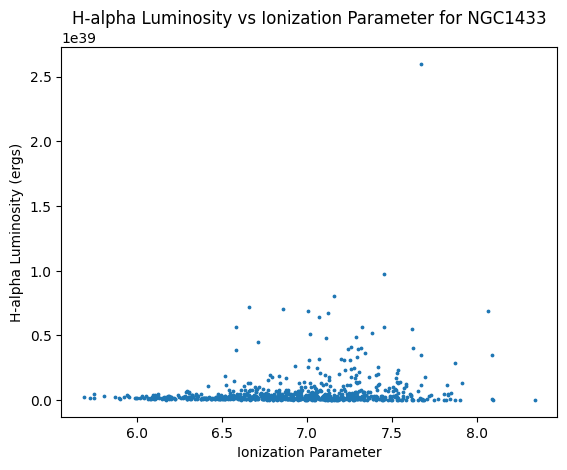

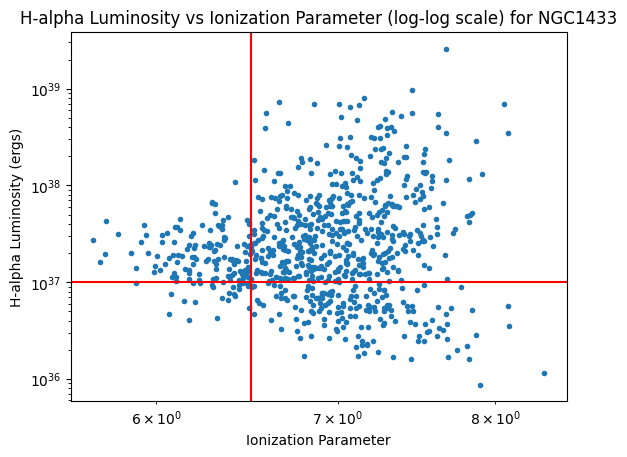

In [45]:
# H-alpha Luminosity vs Ionization Parameter

plt.scatter(ion_par, lum, 3)
plt.xlabel('Ionization Parameter')
plt.ylabel('H-alpha Luminosity (ergs)')
plt.title('H-alpha Luminosity vs Ionization Parameter for {}'.format(gal_name)) 
# plt.ylim(0, 0.025e7)
plt.show()

plt.loglog(ion_par, lum, 'o', markersize=3)
plt.xlabel('Ionization Parameter')
plt.ylabel('H-alpha Luminosity (ergs)')
plt.axvline(6.5, color='r', linestyle='-')
plt.axhline(10**37, color='r', linestyle='-')
plt.title('H-alpha Luminosity vs Ionization Parameter (log-log scale) for {}'.format(gal_name))
plt.show()

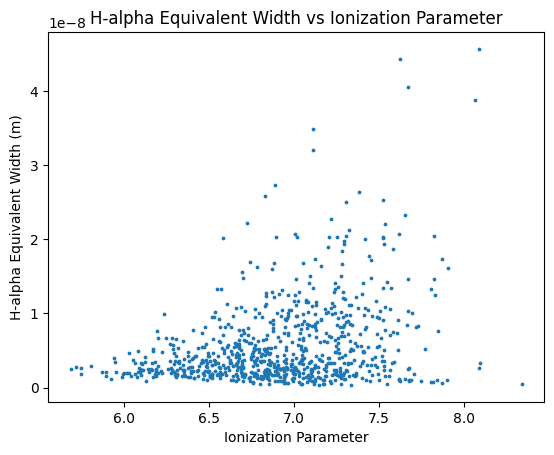

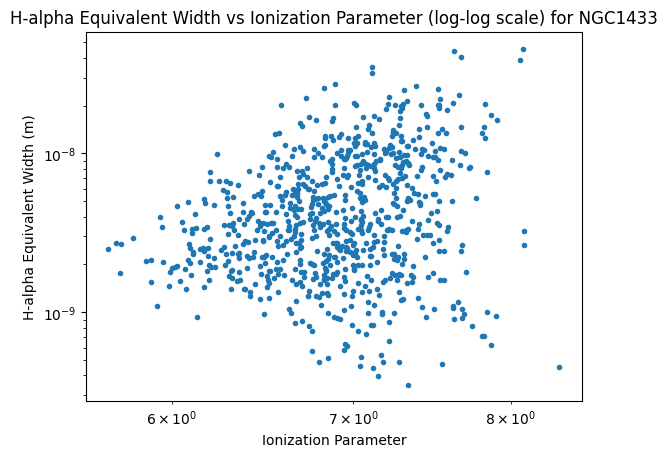

In [46]:
# H-alpha Equivalent Width vs Ionization Parameter

plt.scatter(ion_par, ew, 3)
plt.xlabel('Ionization Parameter')
plt.ylabel('H-alpha Equivalent Width (m)')
plt.title('H-alpha Equivalent Width vs Ionization Parameter')
# plt.ylim(0, 100)
plt.show()

plt.loglog(ion_par, ew, 'o', markersize=3)
plt.xlabel('Ionization Parameter')
plt.ylabel('H-alpha Equivalent Width (m)')
plt.title('H-alpha Equivalent Width vs Ionization Parameter (log-log scale) for {}'.format(gal_name))
plt.show()

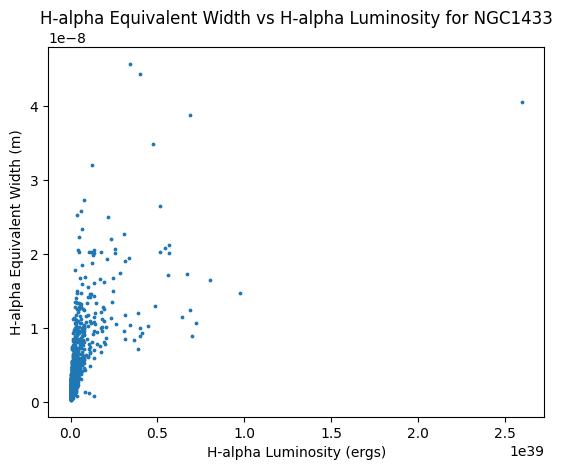

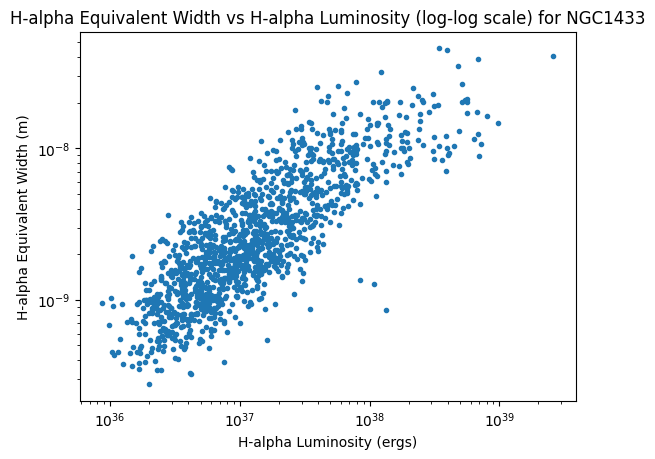

In [47]:
# H-alpha equivalent width vs H-alpha luminosity

plt.scatter(lum, ew, 3)
plt.xlabel('H-alpha Luminosity (ergs)')
plt.ylabel('H-alpha Equivalent Width (m)')
plt.title('H-alpha Equivalent Width vs H-alpha Luminosity for {}'.format(gal_name))
# plt.xlim(0, 0.05e7)
plt.show()

plt.loglog(lum, ew, 'o', markersize=3)
plt.xlabel('H-alpha Luminosity (ergs)')
plt.ylabel('H-alpha Equivalent Width (m)')
plt.title('H-alpha Equivalent Width vs H-alpha Luminosity (log-log scale) for {}'.format(gal_name))
plt.show()

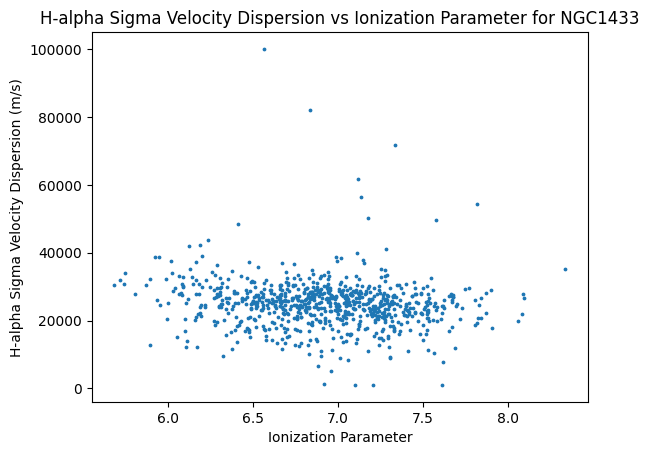

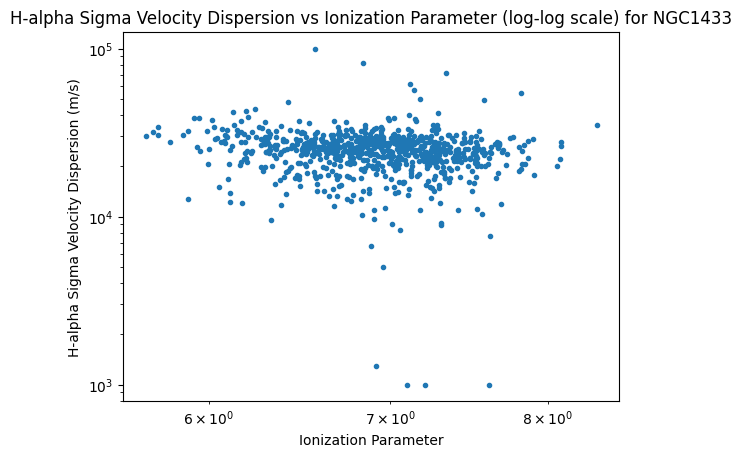

In [48]:
# H-alpha Sigma Velocity Dispersion vs Ionization Parameter

plt.scatter(ion_par, sigma, 3)
plt.xlabel('Ionization Parameter')
plt.ylabel('H-alpha Sigma Velocity Dispersion (m/s)')
plt.title('H-alpha Sigma Velocity Dispersion vs Ionization Parameter for {}'.format(gal_name))
plt.show()

plt.loglog(ion_par, sigma, 'o', markersize=3)
plt.xlabel('Ionization Parameter')
plt.ylabel('H-alpha Sigma Velocity Dispersion (m/s)')
plt.title('H-alpha Sigma Velocity Dispersion vs Ionization Parameter (log-log scale) for {}'.format(gal_name))
plt.show()

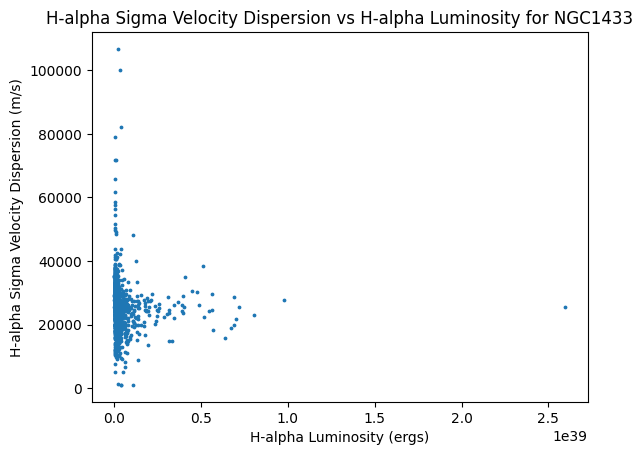

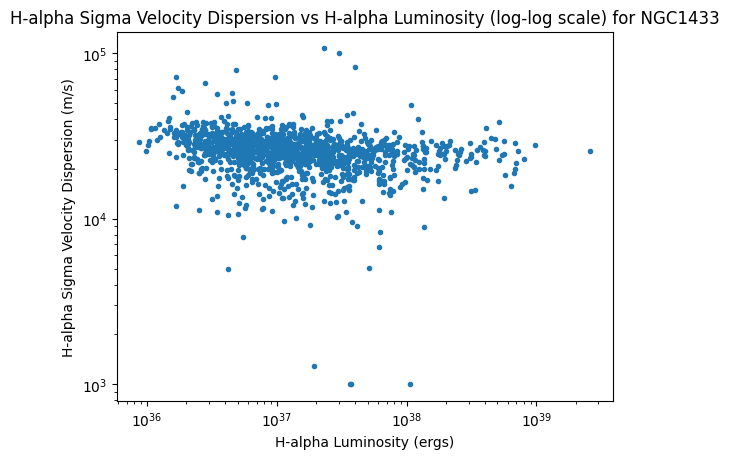

In [49]:
# H-alpha Sigma Velocity Dispersion vs H-alpha Luminosity

plt.scatter(lum, sigma, 3)
plt.xlabel('H-alpha Luminosity (ergs)')
plt.ylabel('H-alpha Sigma Velocity Dispersion (m/s)')
plt.title('H-alpha Sigma Velocity Dispersion vs H-alpha Luminosity for {}'.format(gal_name))
# plt.xlim(0, 0.125e7)
plt.show()

plt.loglog(lum, sigma, 'o', markersize=3)
plt.xlabel('H-alpha Luminosity (ergs)')
plt.ylabel('H-alpha Sigma Velocity Dispersion (m/s)')
plt.title('H-alpha Sigma Velocity Dispersion vs H-alpha Luminosity (log-log scale) for {}'.format(gal_name))
plt.show()

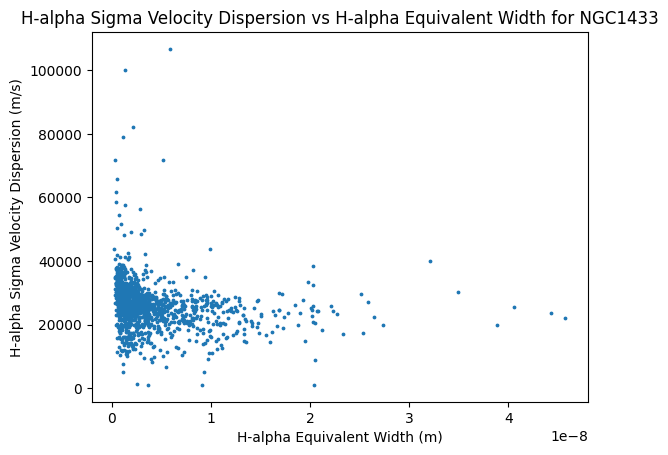

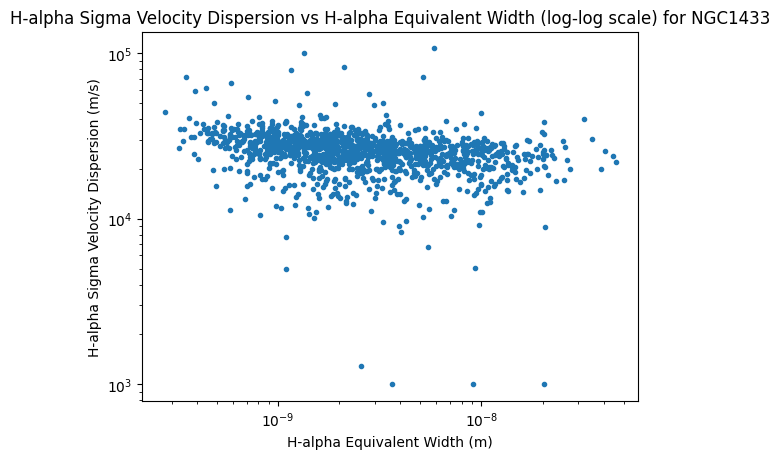

In [50]:
# H-alpha Sigma Velocity Dispersion vs H-alpha Equivalent Width

plt.scatter(ew, sigma, 3)
plt.xlabel('H-alpha Equivalent Width (m)')
plt.ylabel('H-alpha Sigma Velocity Dispersion (m/s)')
plt.title('H-alpha Sigma Velocity Dispersion vs H-alpha Equivalent Width for {}'.format(gal_name))
# plt.xlim(0, 40)
plt.show()

plt.loglog(ew, sigma, 'o', markersize=3)
plt.xlabel('H-alpha Equivalent Width (m)')
plt.ylabel('H-alpha Sigma Velocity Dispersion (m/s)')
plt.title('H-alpha Sigma Velocity Dispersion vs H-alpha Equivalent Width (log-log scale) for {}'.format(gal_name))
plt.show()

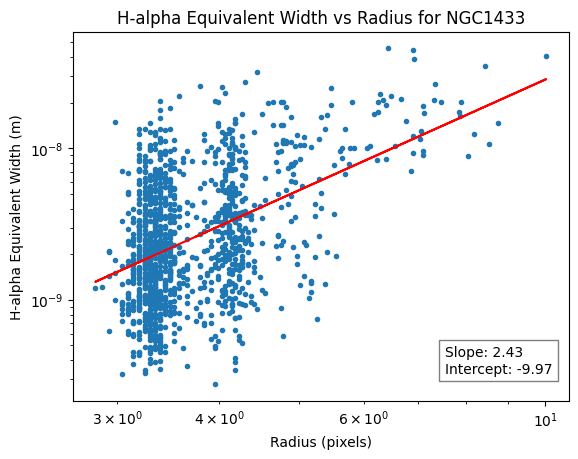

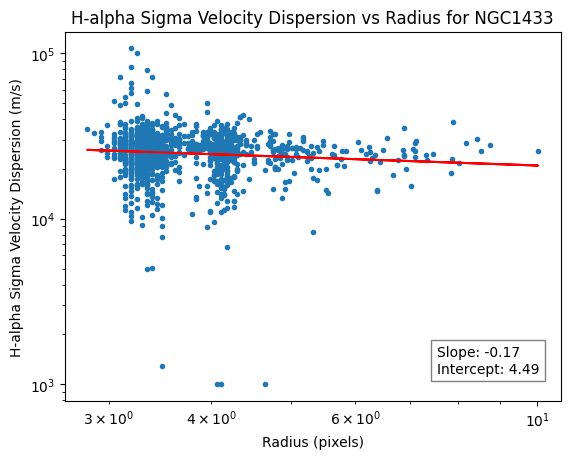

In [51]:
# Plotting the variation of equivalent width and velocity dispersion with radius of the region

# Preparing for the linear fit of H-alpha Equivalent Width vs Radius
log_ew = np.log10(ew)
log_r = np.log10(radius)
coeff = np.polyfit(log_r, log_ew, 1)
slope, intercept = coeff

fit_log_ew = slope * log_r + intercept
fit_ew = 10**fit_log_ew

# H-alpha Equivalent Width vs Radius
plt.loglog(radius, ew, 'o', markersize=3)
plt.loglog(radius, fit_ew, 'r')
plt.xlabel('Radius (pixels)')
plt.ylabel('H-alpha Equivalent Width (m)')
plt.title('H-alpha Equivalent Width vs Radius for {}'.format(gal_name))
text_str = f'Slope: {slope:.2f}\nIntercept: {intercept:.2f}'
plt.text(0.75, 0.15, text_str, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
# plt.xlim(0, 5)
plt.show()

# Preparing for the linear fit of Velcoity Dispersion vs Radius
log_sigma = np.log10(sigma)
coeff = np.polyfit(log_r, log_sigma, 1)
slope, intercept = coeff

fit_log_sigma = slope * log_r + intercept
fit_sigma = 10**fit_log_sigma

# H-alpha Sigma Velocity Dispersion vs Radius
plt.loglog(radius, sigma, 'o', markersize=3)
plt.loglog(radius, fit_sigma, 'r')
plt.xlabel('Radius (pixels)')
plt.ylabel('H-alpha Sigma Velocity Dispersion (m/s)')
plt.title('H-alpha Sigma Velocity Dispersion vs Radius for {}'.format(gal_name))
text_str = f'Slope: {slope:.2f}\nIntercept: {intercept:.2f}'
plt.text(0.75, 0.15, text_str, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
plt.show()

Bin Size: 0.12536566766991936


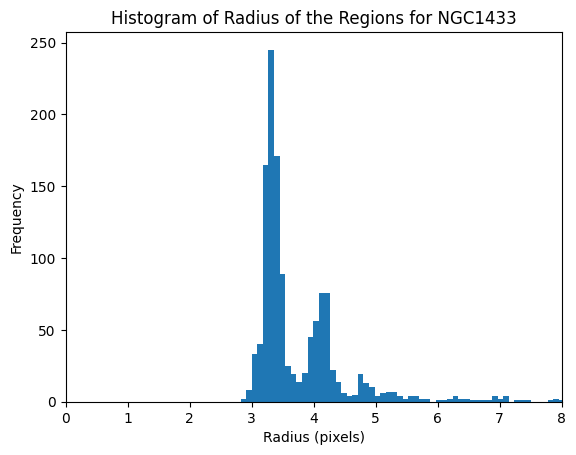

In [52]:
# Plotting a histogram of the radius of the regions
bins = 80
plt.hist(radius, bins=bins)
bin_size = radius.max()/bins
print(f'Bin Size: {bin_size}')
plt.xlabel('Radius (pixels)')
plt.ylabel('Frequency')
plt.title('Histogram of Radius of the Regions for {}'.format(gal_name))
plt.xlim(0, 8)
plt.show()
# plot in log bins
